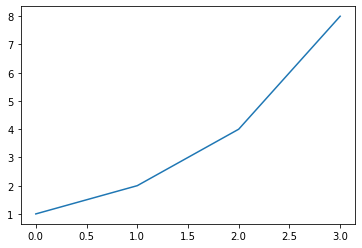

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,4,8])

In [2]:
from brian2 import *
from brian2tools import *

C:\Users\dgoodman\Miniconda3\envs\brian_tutorial\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [3]:
prefs.codegen.target = 'numpy'

In [4]:
2*mV+1*nA

DimensionMismatchError: Cannot calculate 2. mV + 1. nA, units do not match (units are V and A).

The leaky integrate and fire neuron is defined by the equations:

$$\tau\frac{dV}{dt}=-V$$

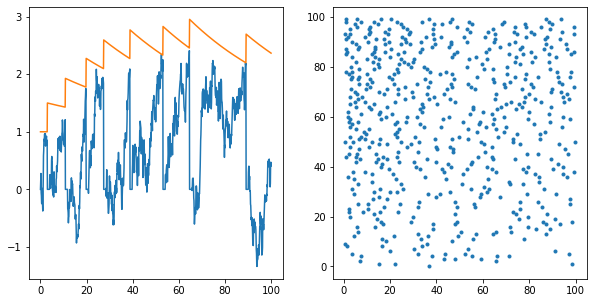

In [6]:
start_scope()

tau = 10*ms
tau_t = 50*ms
f = 100*Hz
eqs = '''
dv/dt = (I-v)/tau + 1.5*xi*tau**-0.5 : 1 (unless refractory)
dvt/dt = (1-vt)/tau_t : 1
I : 1
'''
G = NeuronGroup(100, eqs,
                threshold='v>vt',
                reset='v=0; vt += 0.5',
                refractory=1*ms,
                method='euler')
G.vt = 1
#G.v = 'rand()'
G.I = '3*i/(1.0*N)'

M = StateMonitor(G, ('v', 'vt'), record=[95])
spM = SpikeMonitor(G)

net = Network(G, M, spM)

net.run(100*ms)

figure(figsize=(10,5))
subplot(121)
plot(M.t/ms, M.v[:].T)
plot(M.t/ms, M.vt[:].T)
subplot(122)
#brian_plot(spM)
plot(spM.t/ms, spM.i, '.')

In [ ]:
#print(spM.t)
#print(spM.i)
print(spM.t[5], spM.i[5])

<AxesSubplot:xlabel='time (ms)', ylabel='v'>

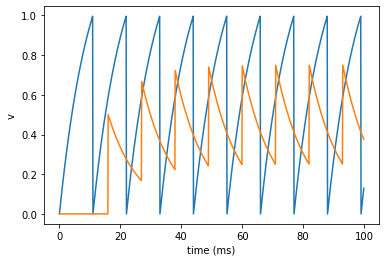

In [21]:
start_scope()

eqs = '''
dv/dt = (I-v)/(10*ms) : 1
I : 1
'''

G = NeuronGroup(2, eqs, threshold='v>1', reset='v=0', method='exact')
G.I = [1.5, 0]

S = Synapses(G, G, 'w : 1', on_pre='v += w')
S.connect(i=0, j=1)
S.w = 0.5
S.delay = 5*ms

M = StateMonitor(G, 'v', record=True)

run(100*ms)

brian_plot(M)

<AxesSubplot:xlabel='source neuron index', ylabel='target neuron index'>

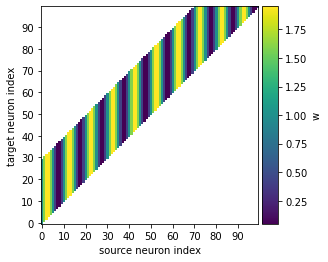

In [48]:
start_scope()

eqs = '''
x : metre
'''

G = NeuronGroup(100, eqs)
G.x = '20*um*i'

S = Synapses(G, G, 'w : 1')
#S.connect(i=0, j=1)
#S.connect(condition='i!=j and abs(i-j)<30')
#S.connect(p=0.5)
#S.connect(condition='i!=j and abs(i-j)<30', p=0.5)
#S.connect(condition='i!=j', p='exp(-(i-j)**2/30.0**2)')
#S.connect(condition='i!=j', p='exp(-(x_pre-x_post)**2/(1000.0*um)**2)')
S.connect(j='k for k in range(i, i+30)', skip_if_invalid=True)

f = 1/(200*um)
S.w = '1+sin(2*pi*f*x_pre)'

brian_plot(S.w)

In [33]:
w = zeros((100, 100))
w[S.i, S.j] = S.w

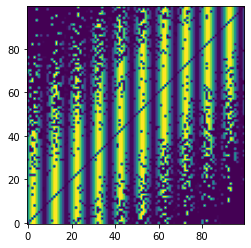

In [36]:
imshow(w.T, origin='lower')

In [37]:
i, j = w.nonzero()

In [38]:
i

array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64)

In [39]:
j

array([ 1,  2,  3, ..., 96, 97, 98], dtype=int64)

In [41]:
w[i, j]

array([1.        , 1.        , 1.        , ..., 0.41221475, 0.41221475,
       0.41221475])

In [ ]:
#S.connect(i=i, j=j)
#S.w = w[i, j]

In [49]:
S.when, S.order

('start', 0)

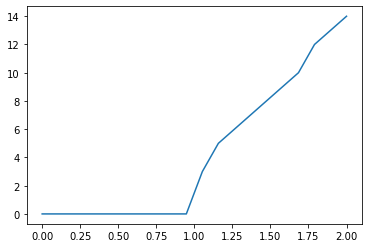

In [54]:
start_scope()

I_values = linspace(0, 2, 20)
counts = []

tau = 10*ms
eqs = '''
dv/dt = (I-v)/tau : 1
'''
G = NeuronGroup(1, eqs, threshold='v>1', reset='v=0', method='exact')
M = SpikeMonitor(G)

store()

for I in I_values:
    restore()
    run(100*ms)
    counts.append(M.num_spikes)

plot(I_values, counts)

WARNING    "I" is an internal variable of group "neurongroup_3", but also exists in the run namespace with the value 2.0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


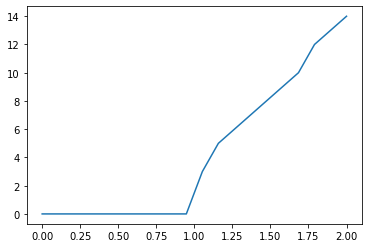

In [55]:
start_scope()

I_values = linspace(0, 2, 20)
counts = []

tau = 10*ms
eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
'''
G = NeuronGroup(len(I_values), eqs, threshold='v>1', reset='v=0', method='exact')
G.I = I_values
M = SpikeMonitor(G)

run(100*ms)

plot(I_values, M.count)

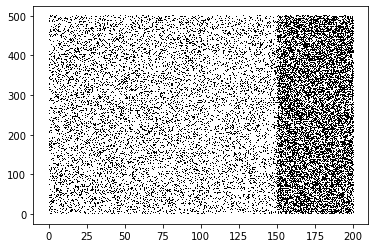

In [77]:
start_scope()

# = PoissonGroup(100, rates=100*Hz)
eqs = '''
rates : Hz (shared)
'''
G = NeuronGroup(500, eqs, threshold='rand()<rates*dt')
M = SpikeMonitor(G)

# for _ in range(4):
#     G.rates = 'rand()*500*Hz'
#     run(50*ms)

#G.run_regularly('rates = rand()*500*Hz', dt=50*ms)

@network_operation(dt=50*ms)
def change_rates():
    G.rates = rand()*500*Hz

run(200*ms)

plot(M.t/ms, M.i, ',k')

In [75]:
rand()*500*Hz

0.33884341 * khertz